<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Manipulation, EDA, and Reporting Results

_Authors: Joseph Nelson (DC), Sam Stack (DC)_

---

> **This lab is intentionally open-ended, and you're encouraged to answer your own questions about the dataset!**


### What makes a song a hit?

On next week's episode of the 'Are You Entertained?' podcast, we're going to be analyzing the latest generation's guilty pleasure- the music of the '00s. 

Our Data Scientists have poured through Billboard chart data to analyze what made a hit soar to the top of the charts, and how long they stayed there. Tune in next week for an awesome exploration of music and data as we continue to address an omnipresent question in the industry- why do we like what we like?

**Provide (at least) a markdown cell explaining your key learnings about top hits: what are they, what common themes are there, is there a trend among artists (type of music)?**

---

### Minimum Requirements

**At a minimum, you must:**

- Use Pandas to read in your data
- Rename column names where appropriate
- Describe your data: check the value counts and descriptive statistics
- Make use of groupby statements
- Utilize Boolean sorting
- Assess the validity of your data (missing data, distributions?)

**You should strive to:**

- Produce a blog-post ready description of your lab
- State your assumptions about the data
- Describe limitations
- Consider how you can action this from a stakeholder perspective (radio, record label, fan)
- Include visualizations

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Billboard data CSV:
billboard_csv = './datasets/billboard.csv'

# We need to use encoding='latin-1' to deal with non-ASCII characters.
df = pd.read_csv(billboard_csv, encoding='latin-1')

In [6]:
df

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Initial Thoughts:
I have the top songs from the year 2000. I can change some column names to make them clear. I could also at a column that is the count of all weeks that are not null which would gove me the total weeks in the Top One Hundred. Can I plot a single index (so an individual song) along the weeks to see it ranking in a plot?

In [12]:
df.dtypes

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week          float64
x3rd.week          float64
x4th.week          float64
x5th.week          float64
x6th.week          float64
x7th.week          float64
x8th.week          float64
x9th.week          float64
x10th.week         float64
x11th.week         float64
x12th.week         float64
x13th.week         float64
x14th.week         float64
x15th.week         float64
x16th.week         float64
x17th.week         float64
x18th.week         float64
x19th.week         float64
x20th.week         float64
x21st.week         float64
x22nd.week         float64
x23rd.week         float64
                    ...   
x47th.week         float64
x48th.week         float64
x49th.week         float64
x50th.week         float64
x51st.week         float64
x52nd.week         float64
x

In [13]:
#Looking at the summary statistics for the dataset. I would expect to seem a min=1 and a max=100 for each x_week column
df.describe()

,year,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
count,317.0,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,81.000000,73.000000,66.000000,61.000000,57.000000,51.500000,47.000000,45.500000,42.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,91.000000,84.000000,79.000000,76.000000,73.250000,72.250000,67.000000,67.000000,67.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2000.0,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Additional thoughts: I notice that the dates are objects. I should investigate that to see what is contained in there that may be forcing that and see if I can relabel it so that I can get a max/min from it.

In [16]:
#Check how many null values I have per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
date.entered       317 non-null object
date.peaked        317 non-null object
x1st.week          317 non-null int64
x2nd.week          312 non-null float64
x3rd.week          307 non-null float64
x4th.week          300 non-null float64
x5th.week          292 non-null float64
x6th.week          280 non-null float64
x7th.week          269 non-null float64
x8th.week          260 non-null float64
x9th.week          253 non-null float64
x10th.week         244 non-null float64
x11th.week         236 non-null float64
x12th.week         222 non-null float64
x13th.week         210 non-null float64
x14th.week         204 non-null float64
x15th.week         197 non-null float64
x16th.week         182 no

Additional Thoughts: I think I could delete all data after week 65 since it is all null information.

In [40]:
df.columns

Index(['year', 'artist', 'track', 'track_duration', 'genre', 'enter_date',
       'peak_date', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       'x60

In [39]:
#Rename columns
df.rename(columns={'artist.inverted':'artist', 'time':'track_duration', 'date.entered':'enter_date', 'date.peaked':'peak_date'}, inplace =True)

In [41]:
df.loc[0,:]

year                                  2000
artist                     Destiny's Child
track             Independent Women Part I
track_duration                        3:38
genre                                 Rock
enter_date                      2000-09-23
peak_date                       2000-11-18
x1st.week                               78
x2nd.week                               63
x3rd.week                               49
x4th.week                               33
x5th.week                               23
x6th.week                               15
x7th.week                                7
x8th.week                                5
x9th.week                                1
x10th.week                               1
x11th.week                               1
x12th.week                               1
x13th.week                               1
x14th.week                               1
x15th.week                               1
x16th.week                               1
x17th.week 

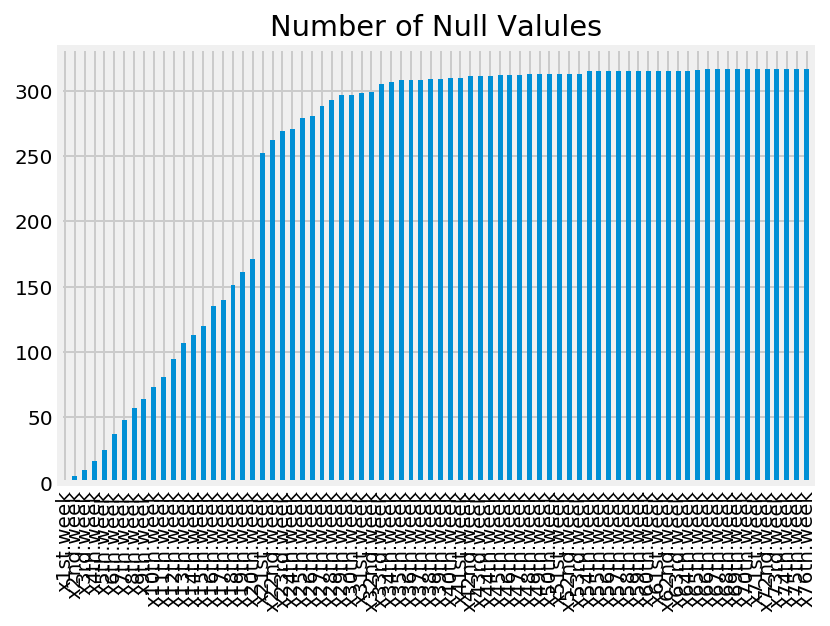

In [53]:
df[['x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week','x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week', 'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week', 'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week', 'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week', 'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week', 'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week', 'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week', 'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week', 'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week', 'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week', 'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week', 'x60th.week', 'x61st.week', 'x62nd.week', 'x63rd.week', 'x64th.week', 'x65th.week', 'x66th.week', 'x67th.week', 'x68th.week', 'x69th.week', 'x70th.week', 'x71st.week', 'x72nd.week', 'x73rd.week', 'x74th.week','x75th.week', 'x76th.week']].isnull().sum().plot(kind='bar');
plt.title('Number of Null Valules');

In [60]:
#Group by genre to find average # of weeks in top 100


In [67]:
total = 317
w20 = 146
w21 = 65
w34 = 10

w20_percent = 146/317
w21_percent = 65/317
w34_percent = 10/317

print(w20_percent, w21_percent, w34_percent)


0.4605678233438486 0.20504731861198738 0.031545741324921134


In [68]:
#remove columns after week 34:

df.drop(['x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week', 'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week', 'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week', 'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week', 'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week', 'x60th.week', 'x61st.week', 'x62nd.week', 'x63rd.week', 'x64th.week', 'x65th.week', 'x66th.week', 'x67th.week', 'x68th.week', 'x69th.week', 'x70th.week', 'x71st.week', 'x72nd.week', 'x73rd.week', 'x74th.week','x75th.week', 'x76th.week'], axis = 1)


,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x25th.week,x26th.week,x27th.week,x28th.week,x29th.week,x30th.week,x31st.week,x32nd.week,x33rd.week,x34th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,14.0,18.0,23.0,23.0,34.0,37.0,43.0,47.0,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,32.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,NaN,NaN,NaN,NaN,NaN,45.0,45.0,45.0,23.0,17.0


In [87]:
df[['artist.inverted', 'track', 'x1st.week', 'x2nd.week']].sort_values('x1st.week').head(10)

,artist.inverted,track,x1st.week,x2nd.week
1,Santana,"Maria, Maria",15,8.0
80,Hanson,This Time Around,22,22.0
45,Pink,There U Go,25,15.0
114,"Carey, Mariah",Crybaby,28,34.0
35,"Elliott, Missy ""Misdemeanor""",Hot Boyz,36,21.0
60,"Martin, Ricky",She Bangs,38,28.0
52,"Backstreet Boys, The",Shape Of My Heart,39,25.0
74,"Dixie Chicks, The",Goodbye Earl,40,29.0
3,Madonna,Music,41,23.0
30,N'Sync,Bye Bye Bye,42,20.0


In [100]:
df[df['x21st.week'].notnull()].transpose()

,0,1,2,3,4,5,6,8,10,11,...,85,88,95,103,105,108,115,152,157,183
year,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
artist.inverted,Destiny's Child,Santana,Savage Garden,Madonna,"Aguilera, Christina",Janet,Destiny's Child,Sisqo,N'Sync,"Aguilera, Christina",...,SoulDecision,Vertical Horizon,Kandi,Son By Four,DMX,"Tritt, Travis","McGraw, Tim","Strait, George",Amber,"Gill, Vince"
track,Independent Women Part I,"Maria, Maria",I Knew I Loved You,Music,Come On Over Baby (All I Want Is You),Doesn't Really Matter,Say My Name,Incomplete,It's Gonna Be Me,What A Girl Wants,...,Faded,You're A God,Don't Think I'm Not,A Puro Dolor (Purest Of Pain),Party Up (Up In Here),Best Of Intentions,My Best Friend,Go On,Sexual (Li Da Di),Feels Like Love
time,3:38,4:18,4:07,3:45,3:38,4:17,4:31,3:52,3:10,3:18,...,3:25,3:45,3:50,3:30,3:45,4:15,4:33,3:48,4:38,4:13
genre,Rock,Rock,Rock,Rock,Rock,Rock,Rock,Rock,Rock,Rock,...,Rock,Rock,Rock,Latin,Rap,Country,Country,Country,Rock,Country
date.entered,2000-09-23,2000-02-12,1999-10-23,2000-08-12,2000-08-05,2000-06-17,1999-12-25,2000-06-24,2000-05-06,1999-11-27,...,2000-07-08,2000-08-26,2000-08-05,2000-04-08,2000-02-26,2000-08-19,1999-11-27,2000-08-26,1999-07-17,2000-09-02
date.peaked,2000-11-18,2000-04-08,2000-01-29,2000-09-16,2000-10-14,2000-08-26,2000-03-18,2000-08-12,2000-07-29,2000-01-15,...,2000-09-09,2000-11-04,2000-10-07,2000-08-19,2000-04-22,2000-12-02,2000-01-29,2000-10-28,2000-02-12,2000-11-18
x1st.week,78,15,71,41,57,59,83,77,82,71,...,94,64,66,80,88,97,85,71,99,82
x2nd.week,63,8,48,23,47,52,83,66,70,51,...,90,55,66,80,74,86,76,67,99,76
x3rd.week,49,6,43,18,45,43,44,61,51,28,...,81,43,66,80,62,79,71,63,96,74
